## Logistic Regression: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Logistic Regression model.

### Read in Data

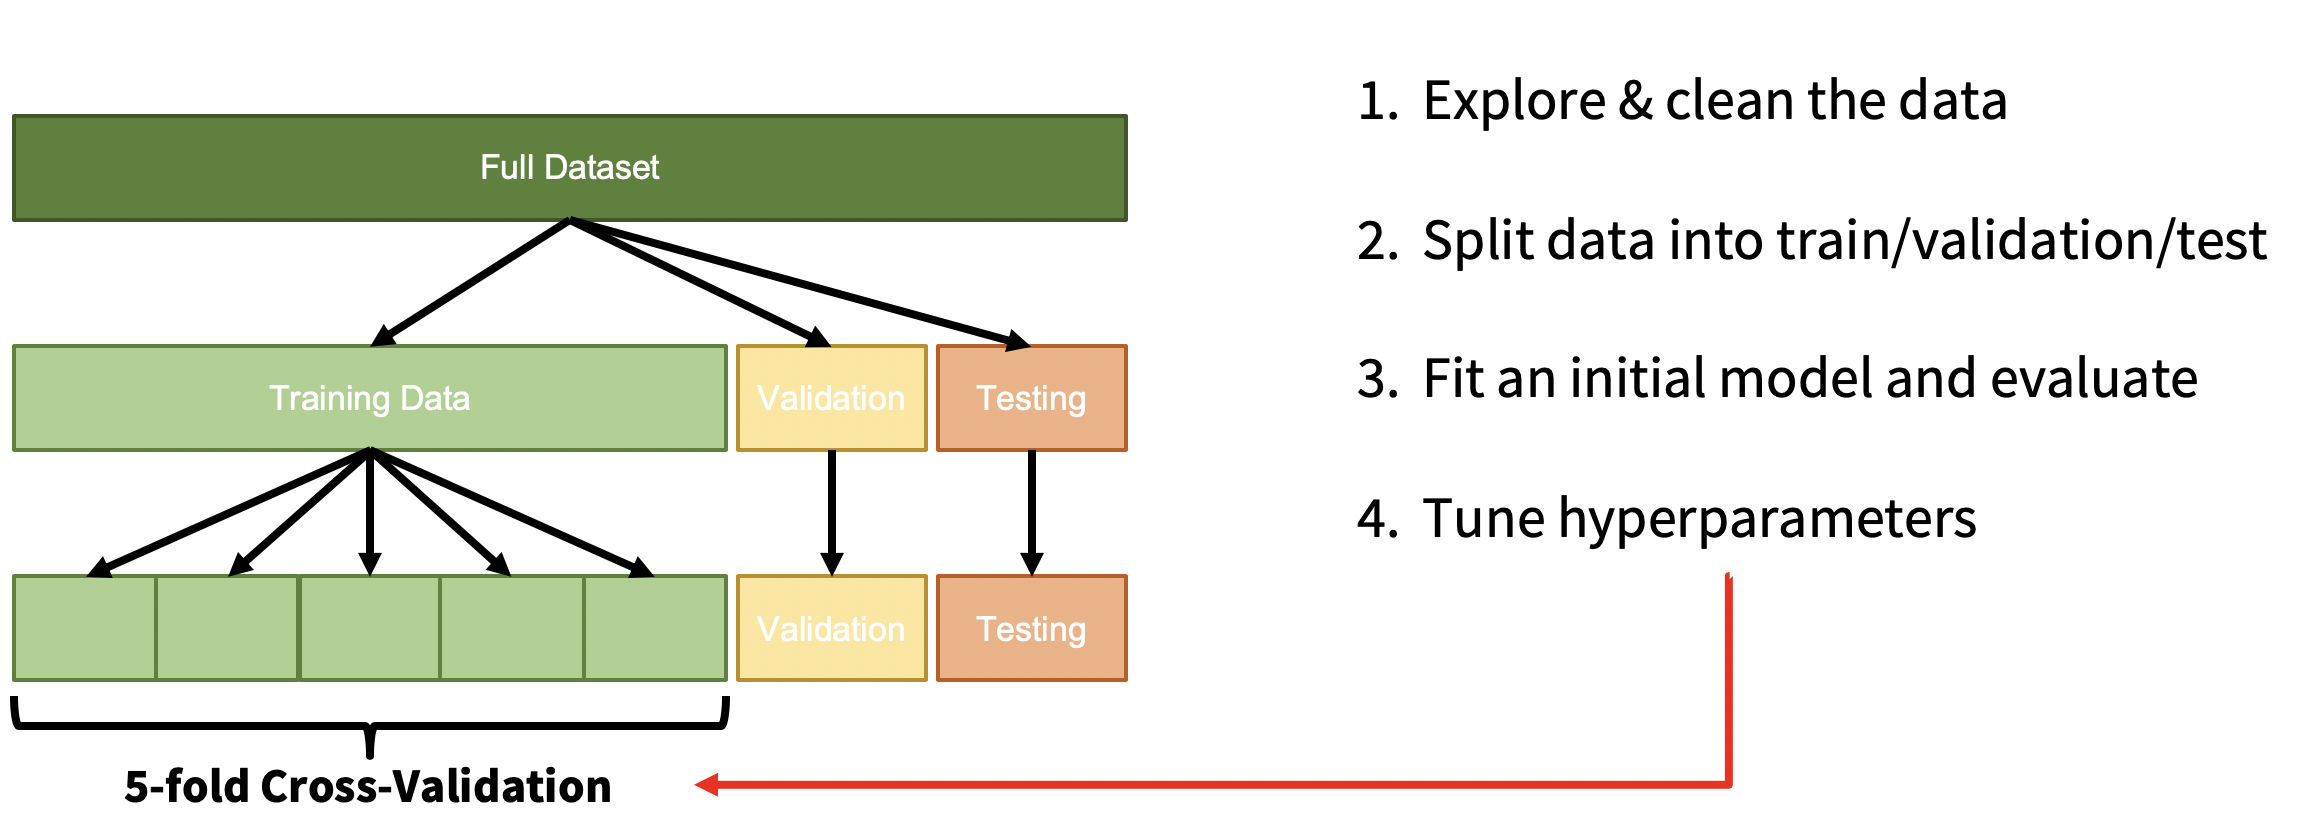


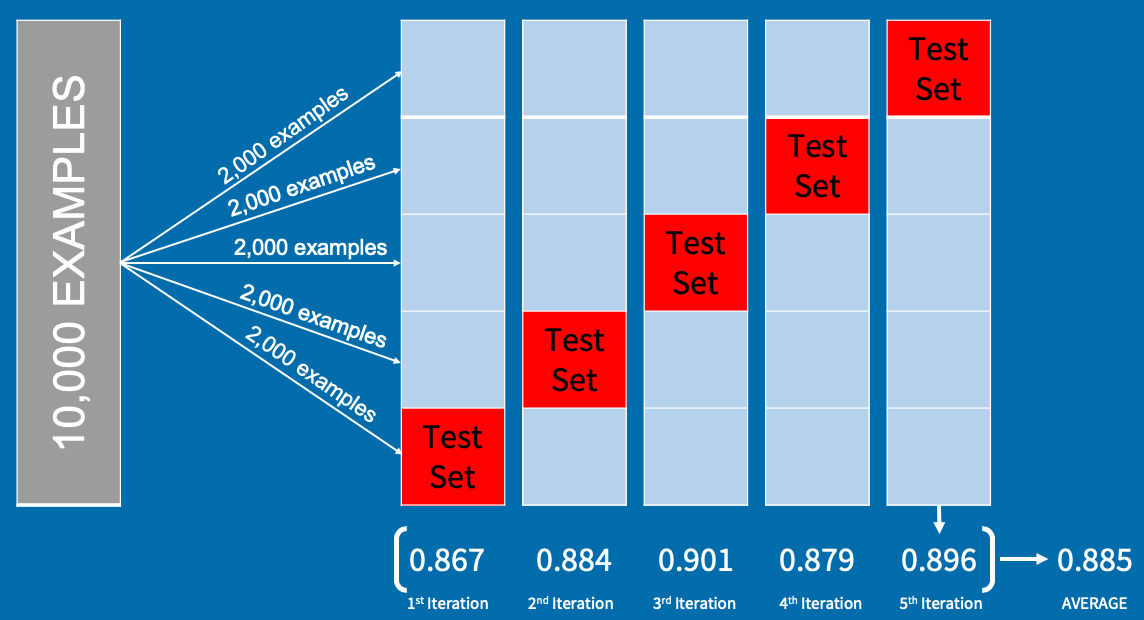

In [16]:
import joblib   #pick a best model and compare
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV    # finding the optimal parameter values
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv(r'E:\Programming\Python\Machine Learning\Ex_Files_Machine_Learning_Algorithms\Exercise Files\train_features.csv')
tr_labels = pd.read_csv(r'E:\Programming\Python\Machine Learning\Ex_Files_Machine_Learning_Algorithms\Exercise Files\train_labels.csv', header=None)   #not get first row as col names

### Hyperparameter tuning
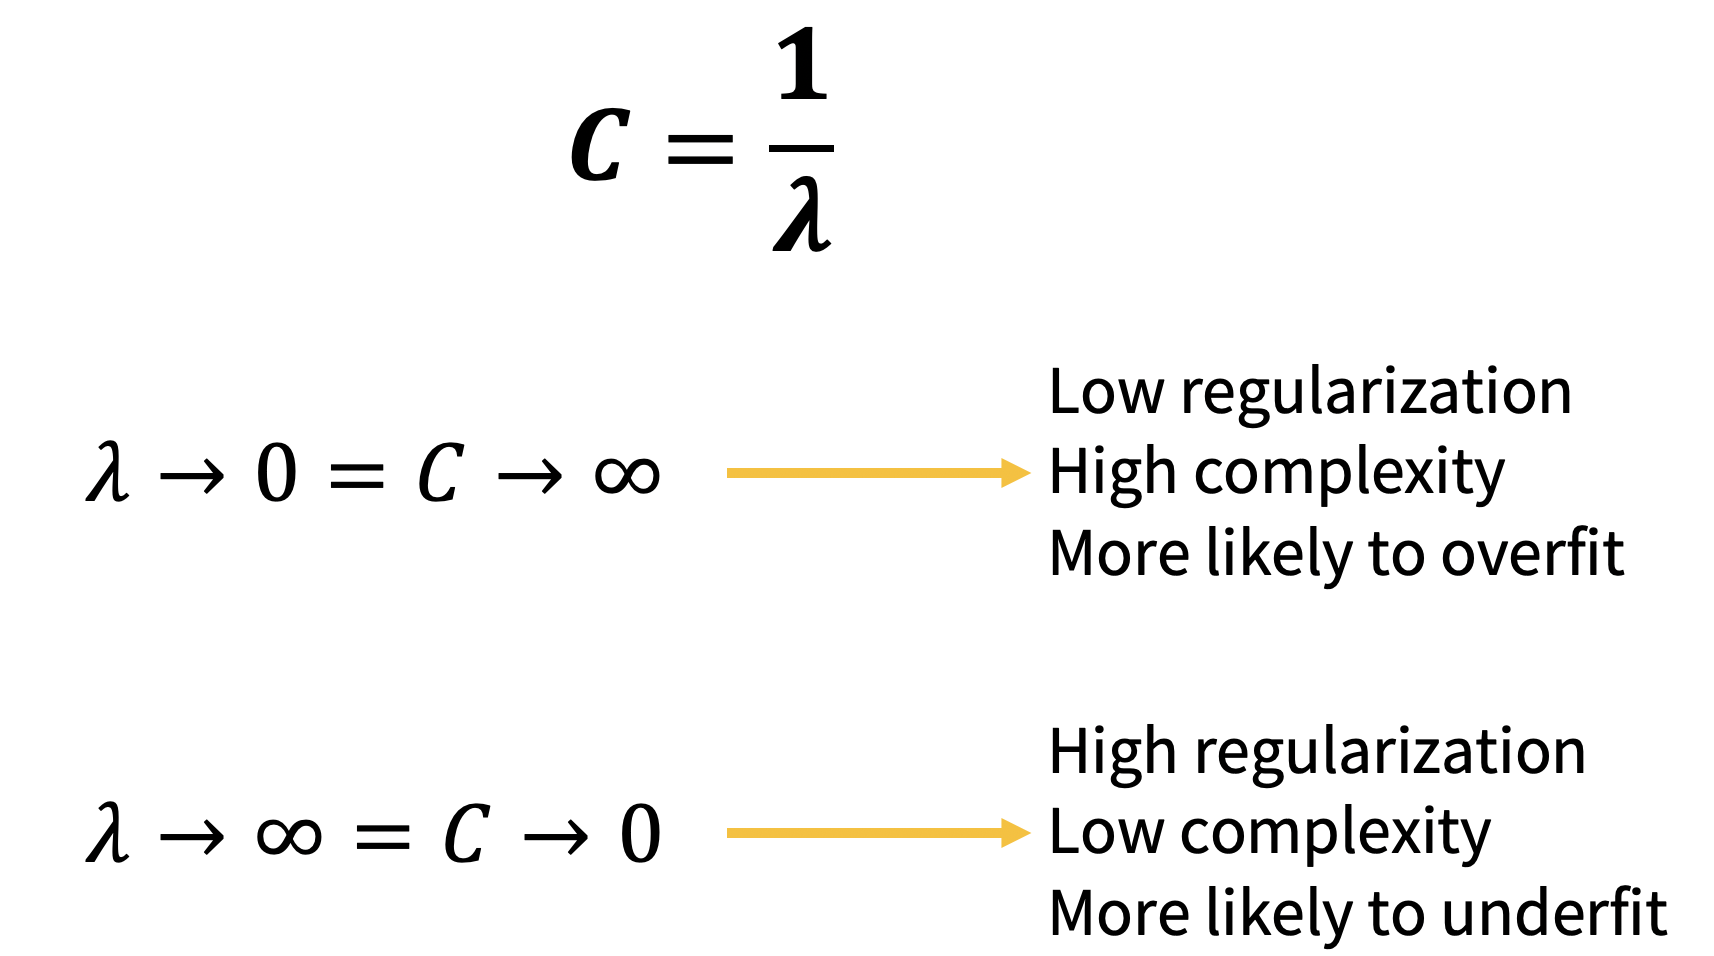

In [2]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [25]:
lr = LogisticRegression(solver='lbfgs',max_iter=10000)
parameters = {
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(tr_features,tr_labels.values.ravel())        # convert vector to array

print_results(cv)

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [19]:
cv.best_estimator_

LogisticRegression(C=1)

### Write out pickled model

In [20]:
joblib.dump(cv.best_estimator_,r'E:\Programming\Python\Machine Learning\Ex_Files_Machine_Learning_Algorithms\Exercise Files\02_LR\LR_model.pkl')

['E:\\Programming\\Python\\Machine Learning\\Ex_Files_Machine_Learning_Algorithms\\Exercise Files\\02_LR\\LR_model.pkl']